In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
X,y=make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

In [3]:
X.shape

(500, 2)

In [4]:
y.shape

(500,)

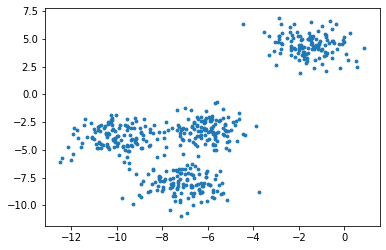

In [5]:
fig,ax1=plt.subplots(1)
ax1.scatter(X[:,0],X[:,1]
#             点的形状
           ,marker='o' 
#             点的大小
            ,s=8
           )
plt.show()

In [6]:
from sklearn.cluster import KMeans
n_clusters =3

In [7]:
cluster=KMeans(n_clusters=n_clusters,random_state=0).fit(X)

In [8]:
#重要属性labels_，查看聚好的类别，每个样本所对应的类
y_pred = cluster.labels_
y_pred


array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

In [9]:
#KMeans因为并不需要建立模型或者预测结果，因此我们只需要fit就能够得到聚类结果了
#KMeans也有接口predict和fit_predict，表示学习数据X并对X的类进行预测
#但所得到的结果和我们不调用predict，直接fit之后调用属性labels一模一样
pre = cluster.fit_predict(X)
pre == y_pred


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
# 我们什么时候需要predict呢?当数据量太大的时候！
#其实我们不必使用所有的数据来寻找质心，少量的数据就可以帮助我们确定质心了
#当我们数据量非常大的时候，我们可以使用部分数据来帮助我们确认质心
#剩下的数据的聚类结果，使用predict来调用

cluster_smallsub = KMeans(n_clusters=n_clusters, random_state=0).fit(X[:200])

In [11]:
#但这样的结果，肯定与直接fit全部数据会不一致。有时候，当我们不要求那么精确，或者我们的数据量实在太大，那我们可以使用这样的方法。
y_pred_ = cluster_smallsub.predict(X)
y_pred == y_pred_


array([False, False,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False,

In [13]:
#重要属性cluster_centers_，查看质心
centroid=cluster.cluster_centers_
centroid

array([[-7.09306648, -8.10994454],
       [-1.54234022,  4.43517599],
       [-8.0862351 , -3.5179868 ]])

In [14]:
#重要属性inertia_，查看总距离平方和
inertia =cluster.inertia_
inertia 

1903.4503741659241

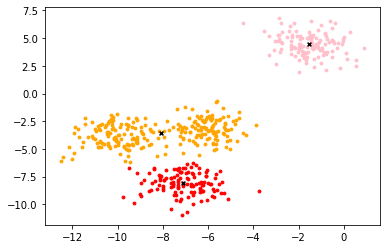

In [15]:
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)

for i in range(n_clusters):
    ax1.scatter(X[y_pred==i, 0], X[y_pred==i, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=color[i]
           )
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker="x"
           ,s=15
           ,c="black")
plt.show()


In [24]:
n_clusters = 4
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

908.3855684760603

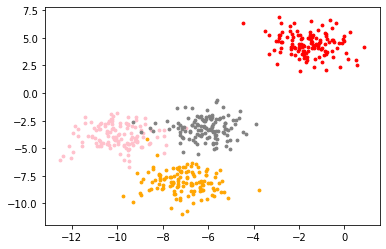

In [17]:
# 生成数据聚类情况
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)

for i in range(4):
    ax1.scatter(X[y==i, 0], X[y==i, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=color[i]
           )
plt.show()


In [26]:

n_clusters = 5
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_


811.0841324482416

In [19]:
n_clusters = 6
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

733.1538350083074

In [20]:
n_clusters = 500
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

0.0

在限制K条件下，求inertia_最小值。。不限制K时，inertia_可以为0.

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [22]:
# 轮廓系数   分3簇
silhouette_score(X,y_pred)

0.5882004012129721

In [25]:
# 轮廓系数   分4簇
silhouette_score(X,cluster_.labels_)          

0.6505186632729437

In [27]:
# 轮廓系数下降   分5簇
silhouette_score(X,cluster_.labels_)    

0.5746932321727456

In [28]:
silhouette_samples(X,y_pred).shape

(500,)

In [29]:
# 每一个样本轮廓系数
# 均值就是silhouette_score
silhouette_samples(X,y_pred).mean()

0.5882004012129721

轮廓系数有很多优点，它在有限空间中取值，使得我们对模型的聚类效果有一个“参考”。并且，轮廓系数对数据的分布没有假设，因此在很多数据集上都表现良好。但它在每个簇的分割比较清洗时表现最好。但轮廓系数也有缺陷，它在凸型的类上表现会虚高，比如基于密度进行的聚类，或通过DBSCAN获得的聚类结果，如果使用轮廓系数来衡量，则会表现出比真实聚类效果更高的分数。

标签未知：轮廓系数；卡林斯基-哈拉巴斯指数 Calinski-Harabaz Index，CHI.CHI指数越高越好。
运行速度快

In [30]:
from sklearn.metrics import calinski_harabasz_score 

In [32]:
X
y_pred

array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

In [33]:
calinski_harabasz_score(X,y_pred)

1809.991966958033

计算运行时间

In [34]:
from time import time

In [37]:
# time()记录下每一次time()这一命令时的时间戳
t0=time()
calinski_harabasz_score(X,y_pred)
time()-t0

0.002504110336303711

In [38]:
t0

1612571789.3956563

In [36]:
# 轮廓系数 运行时间
t0=time()
silhouette_score(X,y_pred)
time()-t0

0.020014047622680664

In [40]:
# 时间戳可以通过datatime中的函数fromtimestamp转换成时间的格式
import datetime
datetime.datetime.fromtimestamp(t0).strftime("%Y-%m%d %H:%M:%S")

'2021-0206 08:36:29'

案例：基于轮廓系数来选择n_clusters
我们通常会绘制轮廓系数分布图和聚类后的数据分布图来选择我们的最佳n_clusters。

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [49]:
# 基于轮廓系数来选择n_clusters
# 每个聚出来的类的轮廓系数是多少，各个类之间的轮廓系数的对比
# 聚类后图像分布是什么模样

#先设定我们要分成的簇数
n_clusters = 4


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


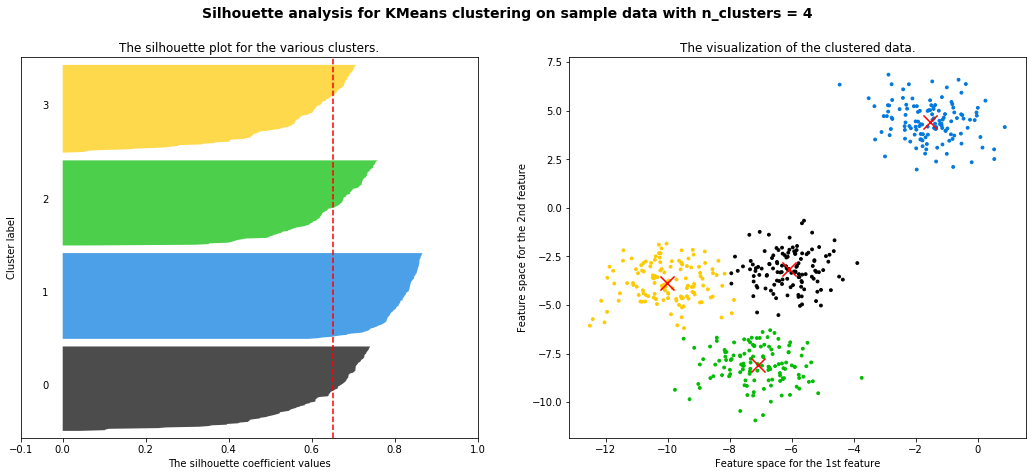

In [53]:
#创建一个画布，画布上共有一行两列两个图
fig,(ax1,ax2)=plt.subplots(1,2)
#画布尺寸
fig.set_size_inches(18,7)
# 第一个图是我们的轮廓系数图像，是由各个簇的轮廓系数组成的横向条形图
# 横向条形图的横坐标是我们的轮廓系数取值，纵坐标是我们的每个样本，因为轮廓系数是对于每一个样本进行计算的
# 首先我们来设定横坐标
# 轮廓系数的取值范围在[-1,1]之间，但我们至少是希望轮廓系数要大于0的
# 太长的横坐标不利于我们的可视化，所以只设定X轴的取值在[-0.1,1]之间
ax1.set_xlim([-0.1, 1])
# 接下来设定纵坐标，通常来说，纵坐标是从0开始，最大值取到X.shape[0]的取值
# 但我们希望，每个簇能够排在一起，不同的簇之间能够有一定的空隙
# 以便我们看到不同的条形图聚合成的块，理解它是对应了哪一个簇
# 因此我们在设定纵坐标的取值范围的时候，在X.shape[0]上，加上一个距离(n_clusters + 1) * 10，留作间隔用,有间隔就行
ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

# 开始建模，调用聚类好的标签
clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
cluster_labels = clusterer.labels_

# 调用轮廓系数分数，注意，silhouette_score生成的是所有样本点的轮廓系数均值
# 两个需要输入的参数是，特征矩阵X和聚类完毕后的标签
silhouette_avg = silhouette_score(X, cluster_labels)
#用print来报一下结果，现在的簇数量下，整体的轮廓系数究竟有多少
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)
# 调用silhouette_samples，返回每个样本点的轮廓系数，这就是我们的横坐标
sample_silhouette_values = silhouette_samples(X, cluster_labels)


#设定y轴上的初始取值
y_lower = 10

#接下来，对每一个簇进行循环
for i in range(n_clusters):
    # 从每个样本的轮廓系数结果中抽取出第i个簇的轮廓系数，并对他进行排序
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
    #注意, .sort()这个命令会直接改掉原数据的顺序
    ith_cluster_silhouette_values.sort()
    
    #查看这一个簇中究竟有多少个样本   样本量
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    
    #这一个簇在y轴上的取值，应该是由初始值(y_lower)开始，到初始值+加上这个簇中的样本数量结束(y_upper)
    y_upper = y_lower + size_cluster_i
    
    #colormap库中的，使用小数来调用颜色的函数
    #在nipy_spectral([输入任意小数来代表一个颜色])
    #在这里我们希望每个簇的颜色是不同的，我们需要的颜色种类刚好是循环的个数的种类
    #在这里，只要能够确保，每次循环生成的小数是不同的，可以使用任意方式来获取小数
    #在这里，我是用i的浮点数除以n_clusters，在不同的i下，自然生成不同的小数
    #以确保所有的簇会有不同的颜色
    color = cm.nipy_spectral(float(i)/n_clusters)
    
    #开始填充子图1中的内容
    #fill_between是填充曲线与直角之间的空间的函数
    #fill_betweenx的直角是在纵坐标上
    #fill_betweeny的直角是在横坐标上
    #fill_betweenx的参数应该输入(定义曲线的点的横坐标，定义曲线的点的纵坐标，x轴上取值，柱状图的颜色)
    ax1.fill_betweenx(np.arange(y_lower, y_upper)
                      ,ith_cluster_silhouette_values
                      ,facecolor=color
                      ,alpha=0.7
                     )

    #为每个簇的轮廓系数写上簇的编号，并且让簇的编号显示坐标轴上每个条形图的中间位置
    #text的参数为(三个参数：要显示编号的位置的横坐标，要显示编号的位置的纵坐标，要显示的编号内容)
    ax1.text(-0.05 , y_lower + 0.5 * size_cluster_i , str(i))

    # 为下一个簇计算新的y轴上的初始值，是每一次迭代之后，y的上线再加上10
    #以此来保证，不同的簇的图像之间显示有空隙
    y_lower = y_upper + 10
    
#给图1加上标题，横坐标轴，纵座标轴的标签
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

#把整个数据集上的轮廓系数的均值以虚线的形式放入我们的图中
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
#让y轴不显示任何刻度
ax1.set_yticks([])

#让x轴上的刻度显示为我们规定的列表
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#开始对第二个图进行处理，首先获取新颜色，由于这里没有循环，因此我们需要一次性生成多个小数来获取多个颜色
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 0], X[:, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=colors
           )
#把生成的质心放到图像中去
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
            c="red", alpha=1, s=200)

#为图二设置标题，横坐标标题，纵坐标标题
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

#为整个图设置标题
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')
plt.show()


<font color=red size=5 face=雅黑>**将上述过程包装成一个循环，可以得到：**</font>

For n_clusters = 2 The average silhouette_score is : 0.7049787496083261


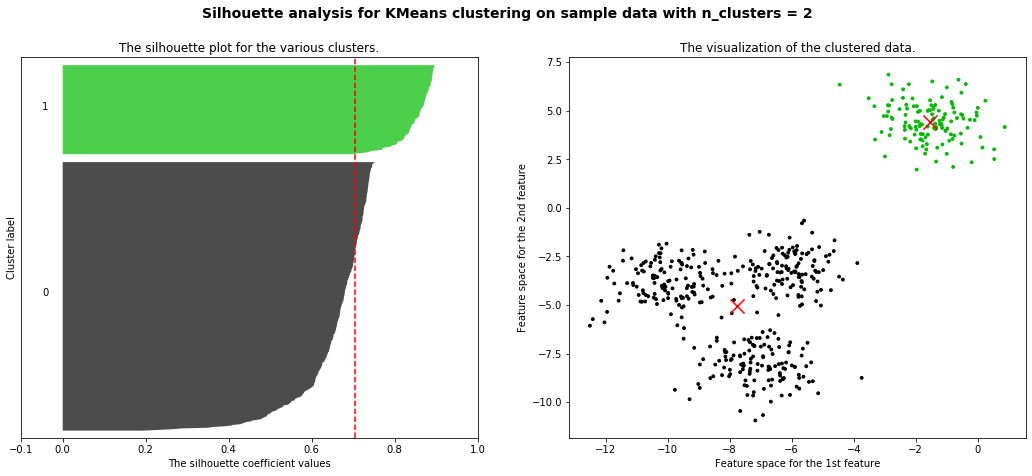

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


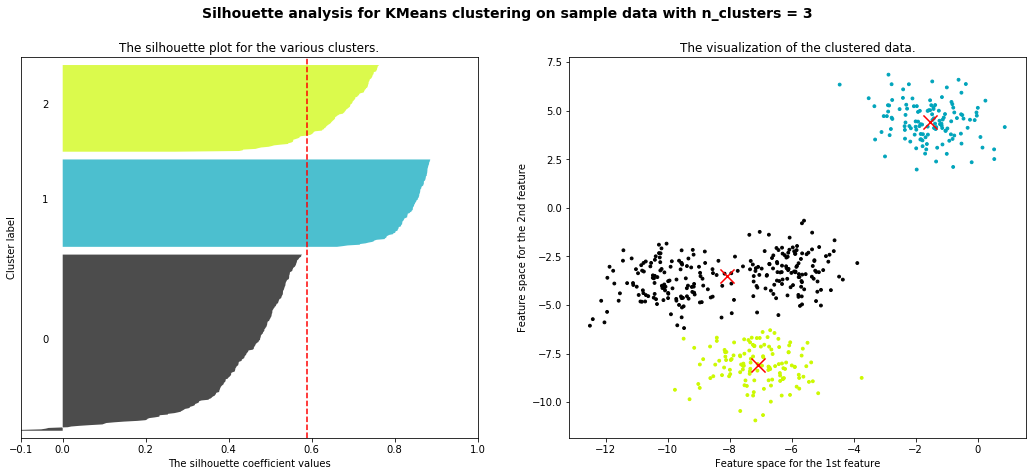

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


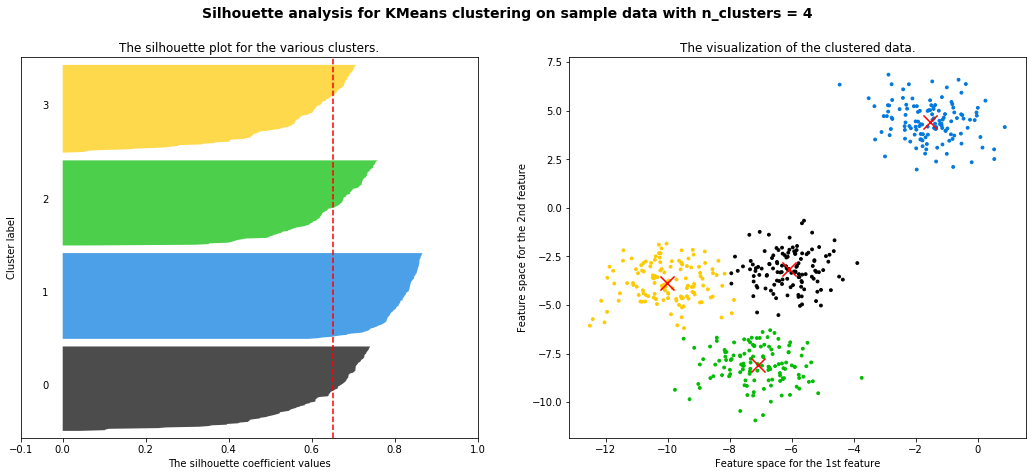

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


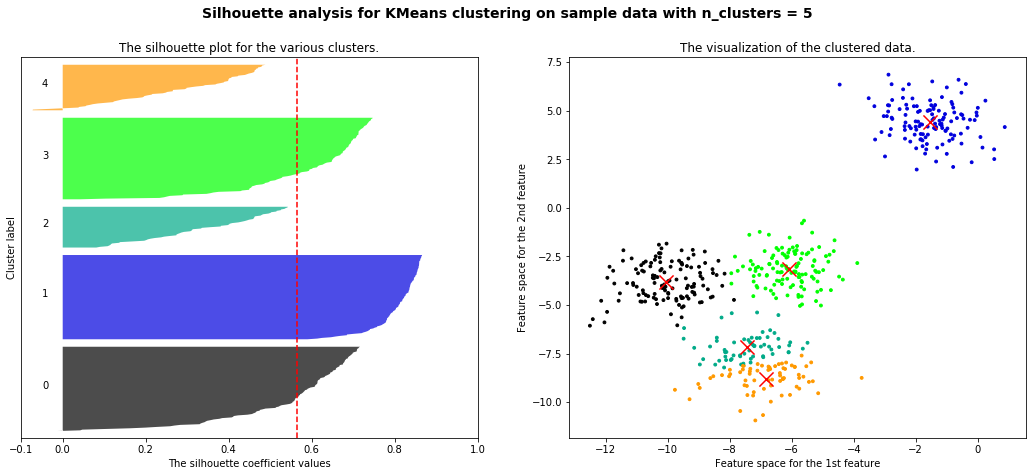

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


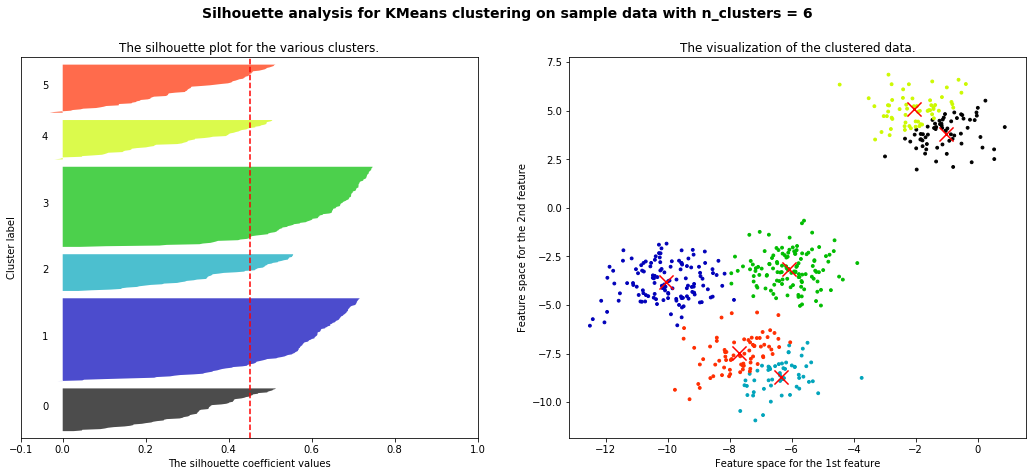

For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


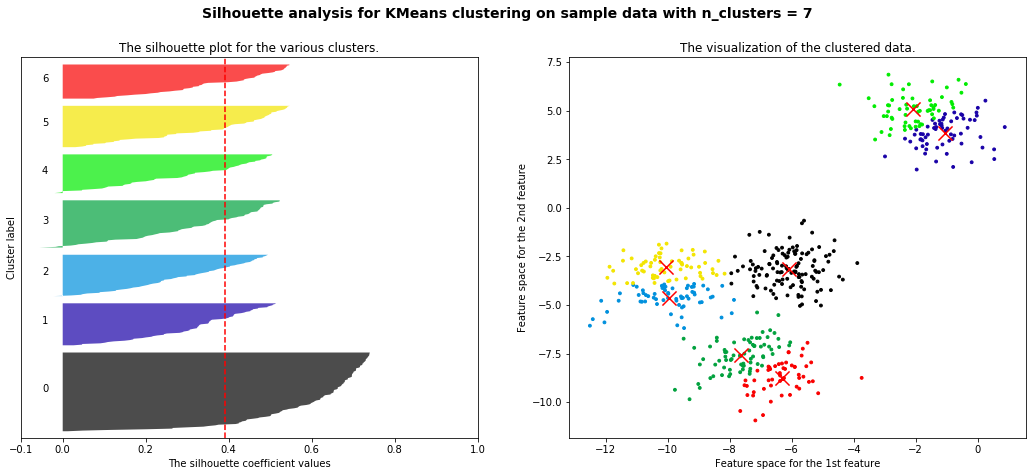

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
                ,marker='o'
                ,s=8
                ,c=colors
               )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

选n=2还是n=4呢？根据业务需求。精准营销，n=2，绿色精准营销，核心用户；黑色，普通营销。只能支撑2个营销线。
做个营销方案，对44个簇精准营销，受时间、金钱受限。 学习曲线不能解决轮廓系数在聚类上的效果的问题，最高轮廓系数要实际分析。

In [57]:
X.shape

(500, 2)

In [58]:
y.shape

(500,)

In [64]:
# k-means++迭代次数少，但是比random运行时间长
# t0=time()
plus=KMeans(n_clusters=10).fit(X)
plus.n_iter_
# time()-t0

0.1355891227722168

In [65]:
# t0=time()
random=KMeans(n_clusters=10,init='random',random_state=420).fit(X)
random.n_iter_
# time()-t0

0.08705520629882812

max_iter:最大迭代次数 tol ：浮点数，迭代间下降的值小于设定的值，就会停下

In [66]:
random=KMeans(n_clusters=10,init='random',max_iter=10,random_state=420).fit(X)
y_pred_max10=random.labels_
silhouette_score(X,y_pred_max10)

0.3952586444034157

In [67]:
random=KMeans(n_clusters=10,init='random',max_iter=20,random_state=420).fit(X)
y_pred_max20=random.labels_
silhouette_score(X,y_pred_max20)

0.34015045375717007

函数cluster.k_means 用法和KMeans相似，输入一系列值，返回结果以此是质心，样本对应的标签，inertia以及最佳迭代次数

In [71]:
from sklearn.cluster import k_means
k_means(X,4,return_n_iter=True)


(array([[ -1.54234022,   4.43517599],
        [ -7.09306648,  -8.10994454],
        [ -6.08459039,  -3.17305983],
        [-10.00969056,  -3.84944007]]),
 array([1, 1, 3, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 3, 3,
        2, 0, 2, 2, 0, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 3, 1, 3, 2, 3, 0, 2,
        2, 1, 3, 2, 0, 0, 0, 3, 3, 2, 1, 3, 3, 3, 3, 2, 0, 0, 3, 2, 0, 2,
        1, 2, 3, 3, 1, 3, 2, 1, 2, 2, 1, 2, 2, 3, 0, 0, 3, 0, 0, 3, 3, 0,
        3, 3, 0, 1, 3, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 3, 0, 2, 2, 0, 0, 3,
        2, 1, 0, 3, 0, 3, 0, 2, 0, 2, 3, 1, 1, 3, 2, 3, 0, 1, 1, 2, 0, 3,
        3, 3, 3, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 0, 1,
        0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 2, 0, 1, 3, 2, 1, 0, 3,
        3, 3, 3, 1, 2, 3, 0, 1, 1, 3, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1,
        1, 0, 1, 3, 0, 2, 2, 1, 2, 3, 1, 2, 3, 2, 3, 1, 2, 2, 2, 0, 3, 0,
        2, 1, 3, 2, 3, 3, 3, 0, 3, 0, 1, 3, 1, 3, 0, 0, 3, 1, 0, 1, 2, 3,
        1, 1, 1, 1, 2, 3, 1, 3, 


<font color=red size=5 face=雅黑>**案例：聚类算法用于降维：KMeans的矢量量化应用**</font>

In [72]:
#矢量量化的降维是在同等样本量上压缩信息的大小，即不改变特征的数目也不改变样本的数目，只改变在这些特征下的样本上的信息量。

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
 #对两个序列中的点进行距离匹配的函数
from sklearn.datasets import load_sample_image
 #导入图片数据所用的类 打乱
from sklearn.utils import shuffle

In [99]:
china = load_sample_image("china.jpg")

In [76]:
china.shape
# 长度  宽度  像素 (三个数决定的颜色)

(427, 640, 3)

In [77]:
# 查看数据类型
china.dtype

dtype('uint8')

In [78]:
china[0][0]

array([174, 201, 231], dtype=uint8)

In [79]:
# 包含多少种不同颜色？ 去重后有9W多
newimage = china.reshape((427 * 640,3))
newimage.shape

(273280, 3)

In [80]:
import pandas as pd
pd.DataFrame(newimage).drop_duplicates().shape

(96615, 3)

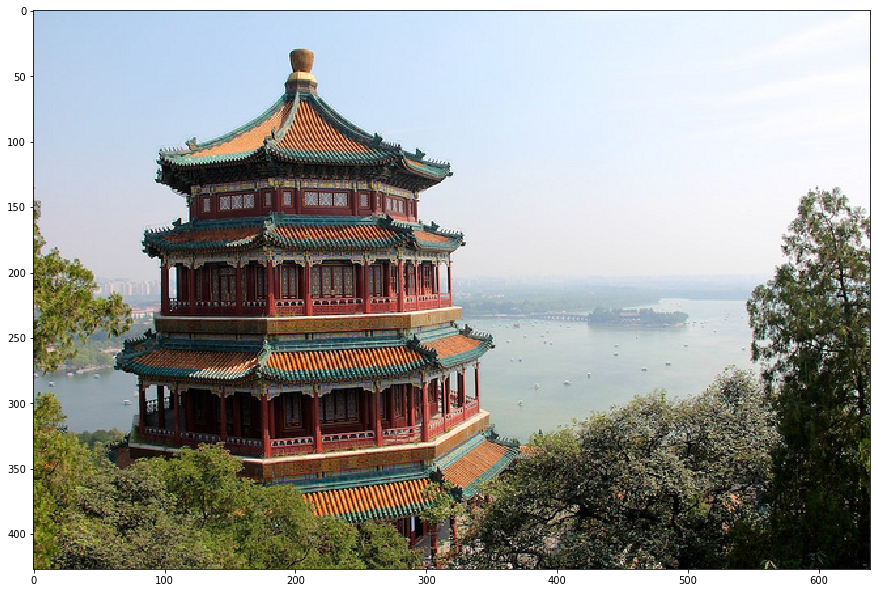

In [81]:
# 图像可视化
plt.figure(figsize=(15,15))
# imshow只接受三维数据
plt.imshow(china)

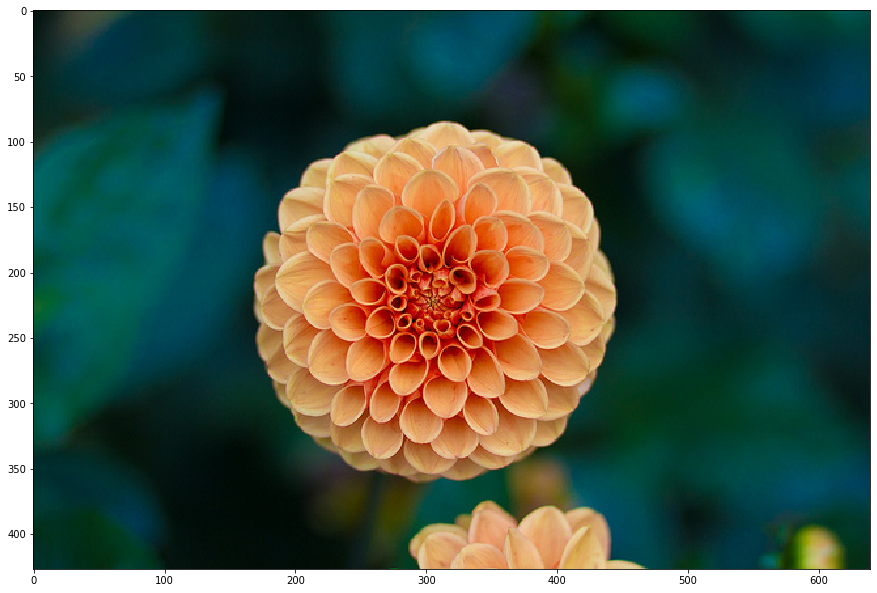

In [82]:
# 另一张图片 花
flower = load_sample_image("flower.jpg")
plt.figure(figsize=(15,15))
plt.imshow(flower)

把9w多种颜色，聚类成64，然后用64个簇的质心来替换原样本。簇中的点都是离质心最近的样本点。

In [83]:
n_clusters=64

In [110]:
#    决定超参数，数据预处理
china = np.array(china, dtype=np.float64) / china.max()
w, h, d = original_shape = tuple(china.shape)
w, h, d

(427, 640, 3)

In [106]:
# plt.imshow在浮点数上表现非常优异，压缩扫[0,1]之间
china=np.array(china,dtype=np.float64)/china.max()

In [88]:
(china<0).sum()

0

In [89]:
(china>1).sum()

0

In [96]:
#设置d=3，不等于3报错,,数据必须是3个特征,如果不等于3，则报错
assert d == 3,"不等于3报错"

AssertionError: 不等于3报错

In [94]:
# 展示assert的功能
d_=5
assert d_==3,"一个格子中特征不等于3个"

AssertionError: 一个格子中特征不等于3个

In [107]:
# reshape改变结构
# reshape：第一个参数 改变结构的对象；第二个对象：要改变的新结构
image_array=np.reshape(china,(w*h,d))
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [108]:
image_array.shape

(273280, 3)

In [102]:
#reshape改变数据结果,只要总数据量不变，维度都可以变化
a = np.random.random((2,4))
a

array([[0.73285869, 0.13443972, 0.56761216, 0.64150409],
       [0.99391166, 0.87250891, 0.63842023, 0.01214971]])

In [103]:
a.reshape((4,2))

array([[0.73285869, 0.13443972],
       [0.56761216, 0.64150409],
       [0.99391166, 0.87250891],
       [0.63842023, 0.01214971]])

In [104]:
np.reshape(a,(2,2,2))

array([[[0.73285869, 0.13443972],
        [0.56761216, 0.64150409]],

       [[0.99391166, 0.87250891],
        [0.63842023, 0.01214971]]])

In [105]:
# 报错 
# 无论是几维，只要乘积不变，维度可以随意变换
np.reshape(a,(3,2))

ValueError: cannot reshape array of size 8 into shape (3,2)

In [113]:
# 以上讲的内容就是以下四行内容
n_clusters=64
china = np.array(china, dtype=np.float64) / china.max()
w, h, d = original_shape = tuple(china.shape)
assert d== 3, "一个格子中的特征数目不等于3种"
image_array=np.reshape(china,(w*h,d))


 对数据进行K-Means的矢量量化


In [116]:
 #首先，使用1000个数据找出质心

image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_.shape

(64, 3)

In [115]:
#找出质心之后，对所有点数据进行聚类
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [119]:
len(set(labels))
#  labels是27W个样本所对应的簇的质心的索引

64

In [120]:
#使用质心来替换所有的样本

image_kmeans = image_array.copy()

for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [122]:
image_kmeans.shape

(273280, 3)

In [124]:
#去重
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [125]:
#恢复图片

image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)


<font color=red size=5 face=雅黑>**对数据进行随机的矢量量化**</font>

In [127]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
# 函数pairwise_distances_argmin(x1,x2,axis)
# 用来计算x2中每个样本到x1中的每个样本点的距离，并返回和x2相同形状的，x1中对应的最近样本点的索引，axis是轴向
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
labels_random.shape

(273280,)

In [130]:
len(set(labels_random))

64

In [131]:
#使用随机质心替换样本
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

In [132]:
#恢复图片 

image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

<font color=red size=5 face=雅黑>**将原图，按KMeans矢量量化和随机矢量量化的图像绘制出来**</font> 

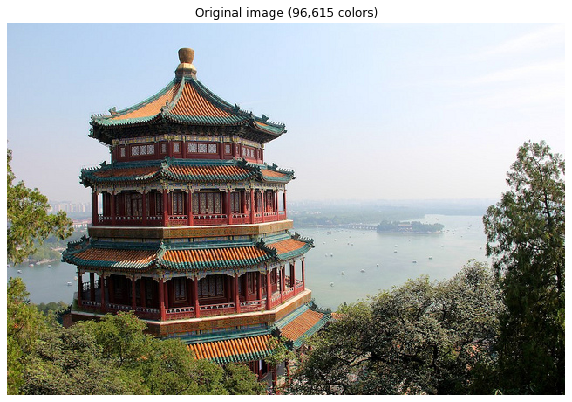

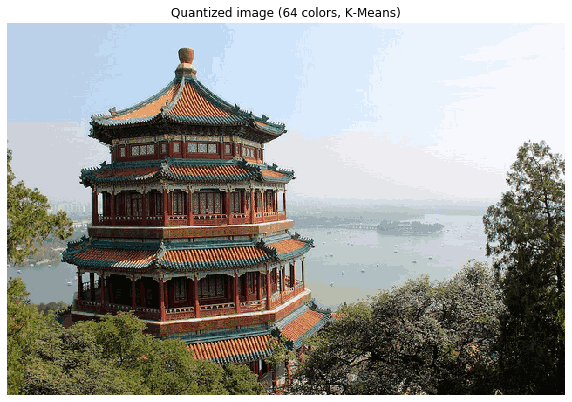

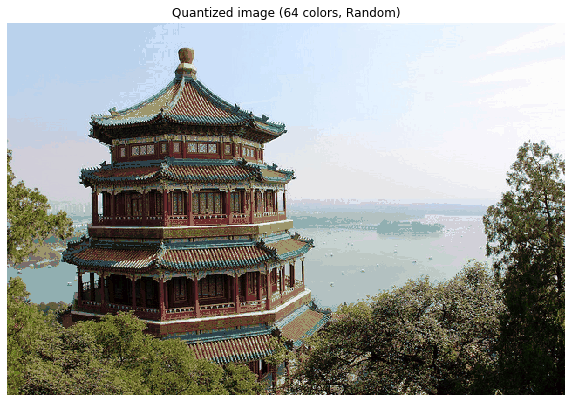

In [147]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)

plt.show()

kmeans没有损失太多，损失较多是湖面和天空，浅色损失多。成功用64种代替9w多种颜色

随机：损失太多，颜色鲜亮损失太多

矢量量化：质心替换原有数据 ，没有降低维度，但是实现对数据进行压缩。